## PROJECT PROBLEM

Customer churn in bank ABC has been worrisome to the Mnagement. Customer churn report have been tracked on a daily basis for a couple of years and have been provided in the project data file. The Bank would like to drastically reduce the spate of churn recorded. Being effective involves knowing churn patterns and when they are likely to occur. To also help the Executive Managment to take appropriate decision. I, as a data analyst will conduct full data analytics and predictive modeling to uncover insights from the data that can be used to effectively curtail the rate of customer churn in the bank. 

## INTRODUCTION

We aim to accomplish the following for this study:

Identify and visualize which factors contribute to customer churn:
Build a prediction model that will perform the following:
Classify if a customer is going to churn or not
Preferably and based on the model performance, choose a model that will attach a probability to the churn to
make it easier for customer service to target low hanging fruits in their efforts to orevent churn

## IMPORTING LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

## LOADING DATASET

In [5]:
df = pd.read_csv('C:/Users/ACER/Documents/WorkSpace/BankCustomerChurn.csv')

In [6]:
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
#Checking the shape of the dataset
df.shape

(10000, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [9]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [11]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [12]:
# for customer churn for bank has nothing to do with CustomerId
# so let us drop those column
df = df.drop(columns = ['customer_id'])

In [13]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
# Listing out the columns of the data 
df.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [15]:
# Checking the data types of each variables
df.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

## Exploratory Data Analysis

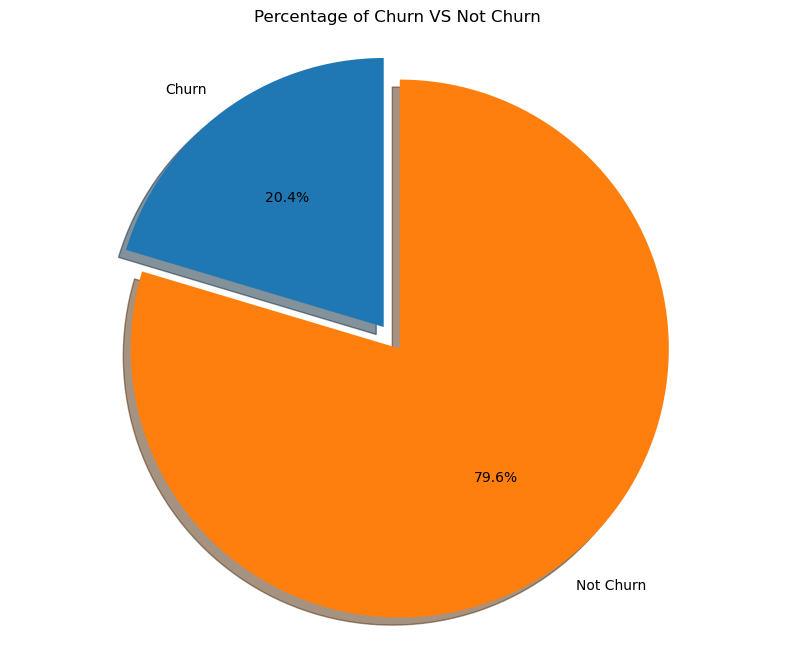

In [16]:
# Pie Chart, where the slices will be ordered and plotted counter-clockwise:
labels = "Churn", "Not Churn"
sizes = [df.churn[df['churn'] == 1].count(), df.churn[df['churn'] == 0].count()]
explode = (0, 0.1) # only "explode" the 2nd slice
fig1, ax1 = plt.subplots(figsize = (10, 8))
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of Churn VS Not Churn")
plt.show()


<AxesSubplot:title={'center':'Frequency Distribution Of Gender'}>

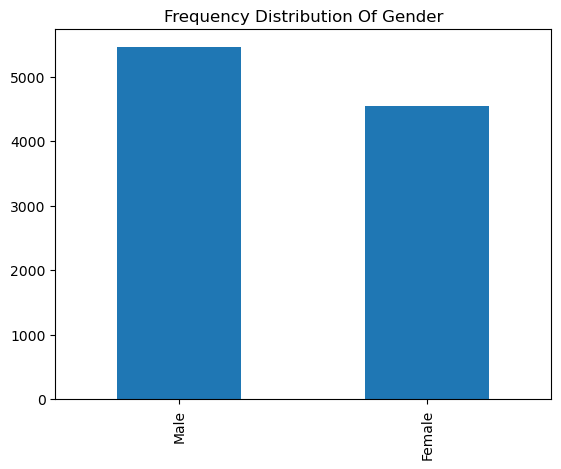

In [17]:
# Graphical representation of the gender using bar chart
df['gender'].value_counts().plot(kind='bar',y='value_column',title='Frequency Distribution Of Gender')

<AxesSubplot:title={'center':'Frequency Distribution Of Country'}>

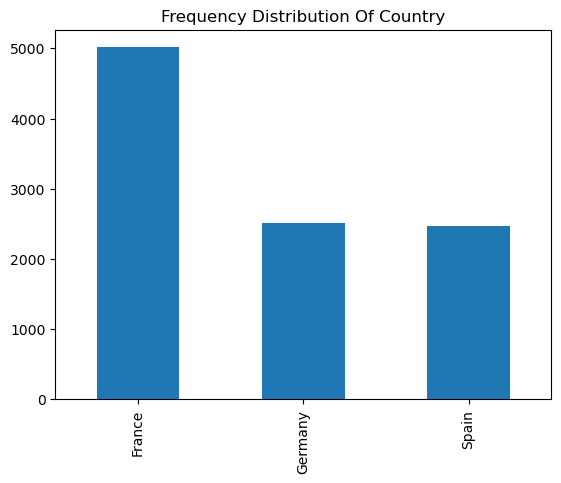

In [18]:
# Graphical representation of the country using bar chart
df['country'].value_counts().plot(kind='bar', y='value_column',title='Frequency Distribution Of Country')

<AxesSubplot:xlabel='country', ylabel='count'>

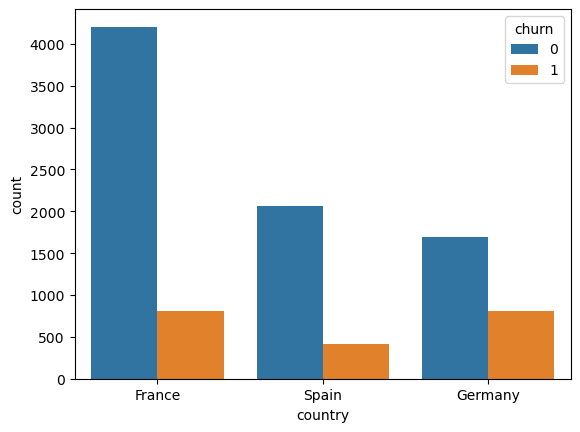

In [19]:
sns.countplot(data=df, x='country', hue='churn')

In [20]:
df[['country', 'churn']].value_counts(normalize =True)*100

country  churn
France   0        42.04
Spain    0        20.64
Germany  0        16.95
         1         8.14
France   1         8.10
Spain    1         4.13
dtype: float64

<AxesSubplot:xlabel='products_number', ylabel='count'>

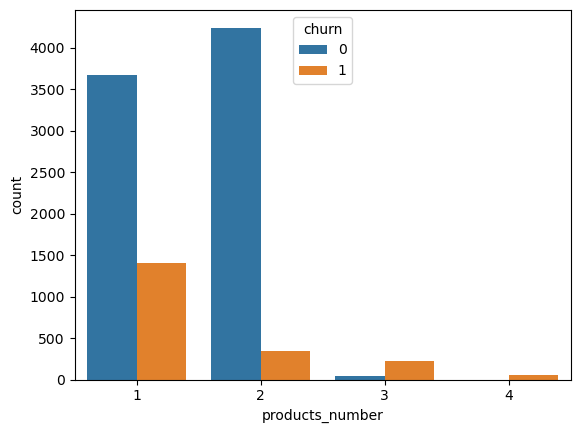

In [21]:
sns.countplot(data=df, x='products_number', hue='churn')

In [22]:
df[['products_number', 'churn']].value_counts(normalize =True)*100

products_number  churn
2                0        42.42
1                0        36.75
                 1        14.09
2                1         3.48
3                1         2.20
4                1         0.60
3                0         0.46
dtype: float64

<AxesSubplot:xlabel='gender', ylabel='products_number'>

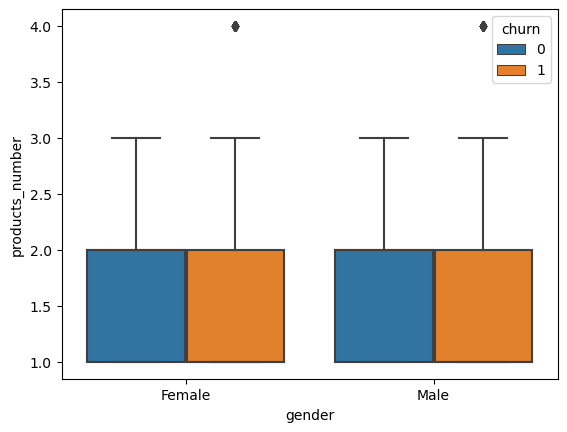

In [23]:
sns.boxplot(data=df, y='products_number', x='gender', hue='churn')

<AxesSubplot:xlabel='gender', ylabel='count'>

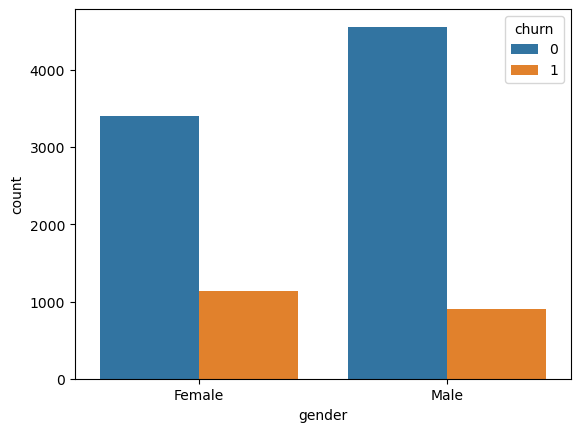

In [24]:
# Checking gender in relation to churn
sns.countplot(data=df, x='gender', hue='churn')

In [25]:
df[['gender', 'country', 'churn']].value_counts(normalize =True)*100

gender  country  churn
Male    France   0        24.03
Female  France   0        18.01
Male    Spain    0        12.06
        Germany  0         9.50
Female  Spain    0         8.58
        Germany  0         7.45
        France   1         4.60
        Germany  1         4.48
Male    Germany  1         3.66
        France   1         3.50
Female  Spain    1         2.31
Male    Spain    1         1.82
dtype: float64

More female customers left the bank than their male counterpart

<AxesSubplot:xlabel='country', ylabel='count'>

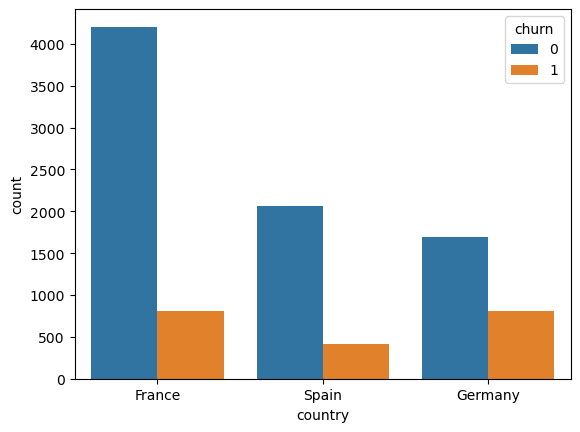

In [26]:
sns.countplot(data=df, x='country', hue='churn')

<AxesSubplot:xlabel='country', ylabel='churn'>

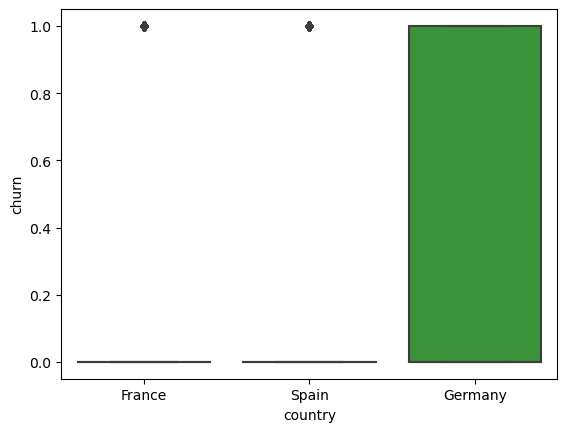

In [27]:
sns.boxplot(data=df, x='country', y='churn')

churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

<AxesSubplot:xlabel='credit_score', ylabel='tenure'>

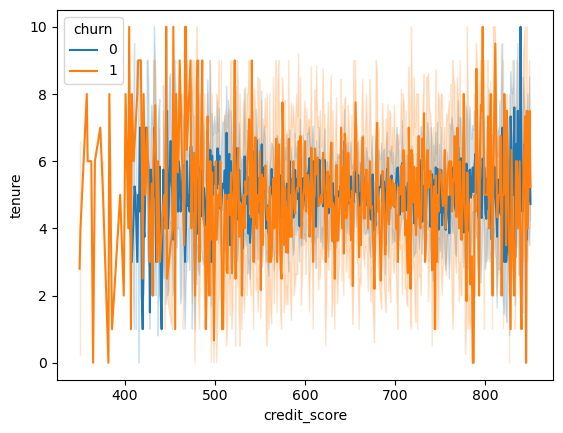

In [28]:
sns.lineplot(data=df, x='credit_score', y='tenure', hue='churn')

<AxesSubplot:xlabel='products_number', ylabel='churn'>

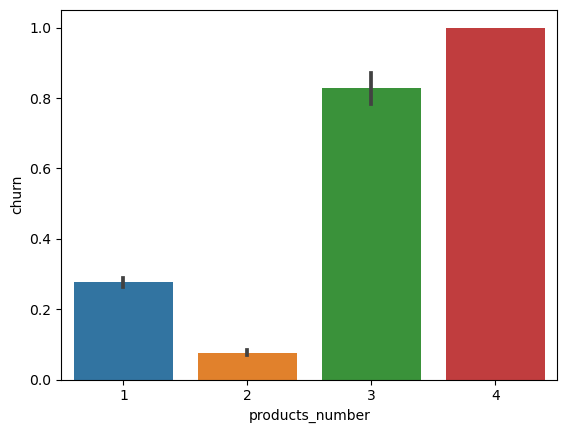

In [29]:
#plt.figure(figsize=(15,8))
sns.barplot(data=df, x='products_number', y='churn')

<AxesSubplot:xlabel='tenure', ylabel='credit_score'>

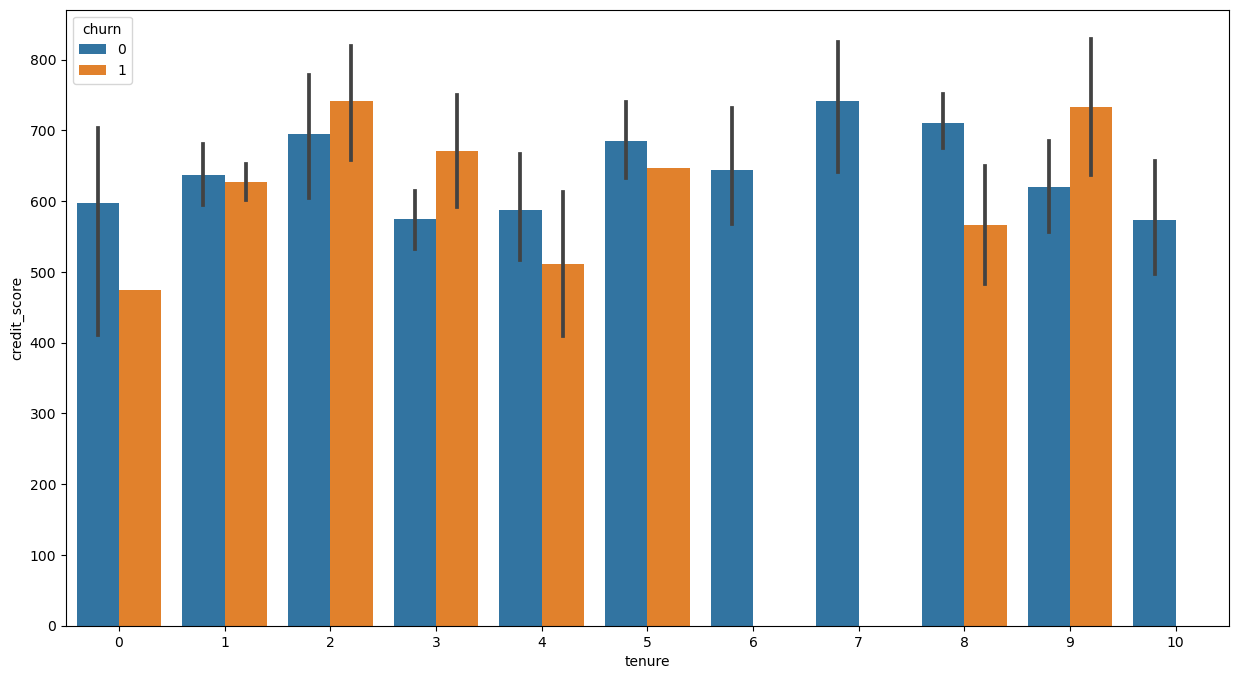

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(data=df[0:100], y='credit_score', x='tenure', hue='churn')

#More customers with over 600 credit score with tenure 1,2,3,5 and 9 left the bank.
#no customer with 6,7 and 10 loan tenure left the bank. and they had over 600 credit score. 
#The Bank should give more loan for 6 and 7 months tenure.

<AxesSubplot:xlabel='age', ylabel='credit_score'>

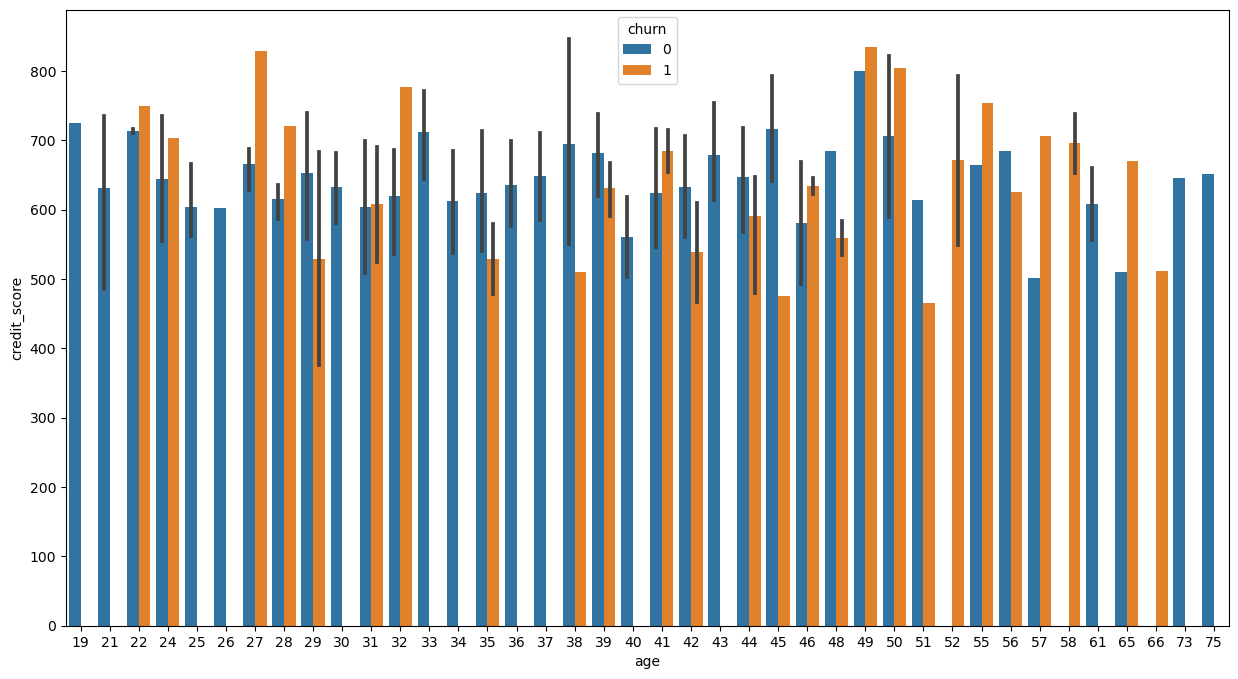

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(data=df[0:200], y='credit_score', x='age', hue='churn')

#The best age group to avail facility are 19-21, 25-26, 30, 36-37, 40, 43, 61, 73-75.
#The above age group did not leave the bank even with a credit score of 600 and above

<AxesSubplot:xlabel='age', ylabel='tenure'>

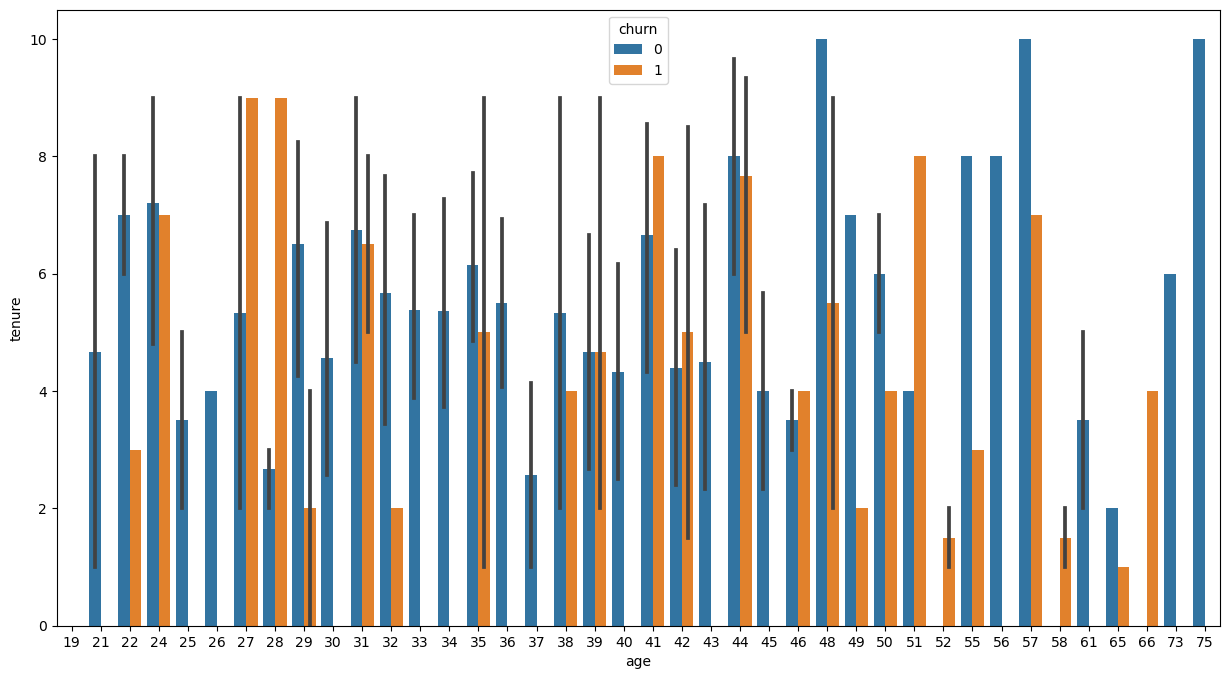

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(data=df[0:200], y='tenure', x='age', hue='churn')

In [33]:
print(df['credit_score'].min())
print(df['credit_score'].max())
df['credit_score'].unique()

350
850


array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [34]:
# Creating new feature credit_scoreGroup as bin

In [35]:
def credit_scoreGroup(s):
    if s<=400:
        return 1
    elif s>400 and s<=450:
        return 2
    elif s>450 and s<=500:
        return 3
    elif s>500 and s<=550:
        return 4
    elif s>550 and s<=600:
        return 5
    elif s>600 and s<=650:
        return 6
    elif s>650 and s<=700:
        return 7
    elif s>700 and s<=750:
        return 8
    else:
        return 9

df["credit_scoreGroup"]=df["credit_score"].apply(lambda x: credit_scoreGroup(x))

In [36]:
df["credit_scoreGroup"].value_counts()

7    1947
6    1871
9    1598
8    1518
5    1445
4     978
3     454
2     170
1      19
Name: credit_scoreGroup, dtype: int64

<AxesSubplot:xlabel='credit_scoreGroup', ylabel='count'>

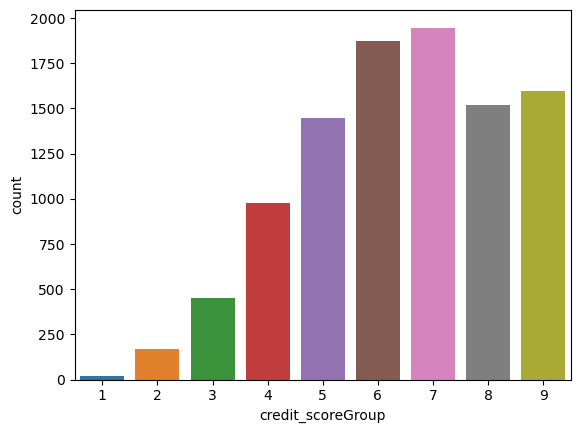

In [37]:
sns.countplot(data = df, x=df["credit_scoreGroup"])

<AxesSubplot:xlabel='credit_scoreGroup', ylabel='count'>

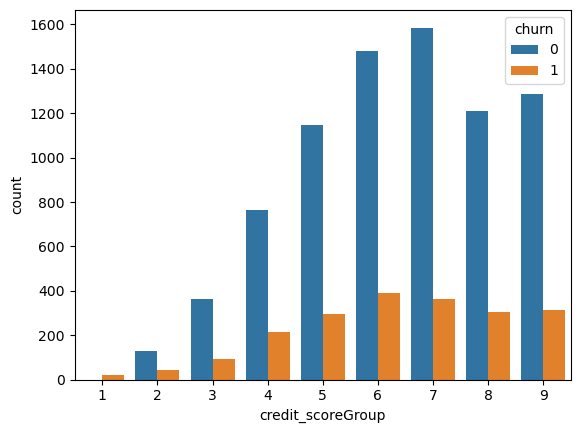

In [38]:
sns.countplot(data = df, x=df["credit_scoreGroup"], hue='churn')

In [39]:
df['balance'].value_counts()[:0]

0.0    3617
Name: balance, dtype: int64

In [40]:
df['products_number'].unique()

array([1, 3, 2, 4], dtype=int64)

In [41]:
df['products_number'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

In [42]:
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [43]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [44]:
csvaCount = df.credit_score.value_counts().index
csvaCount

Int64Index([850, 678, 655, 705, 667, 684, 670, 651, 683, 652,
            ...
            386, 440, 358, 407, 423, 404, 351, 365, 417, 419],
           dtype='int64', length=460)

In [45]:
df.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'credit_scoreGroup'],
      dtype='object')

<AxesSubplot:xlabel='active_member', ylabel='count'>

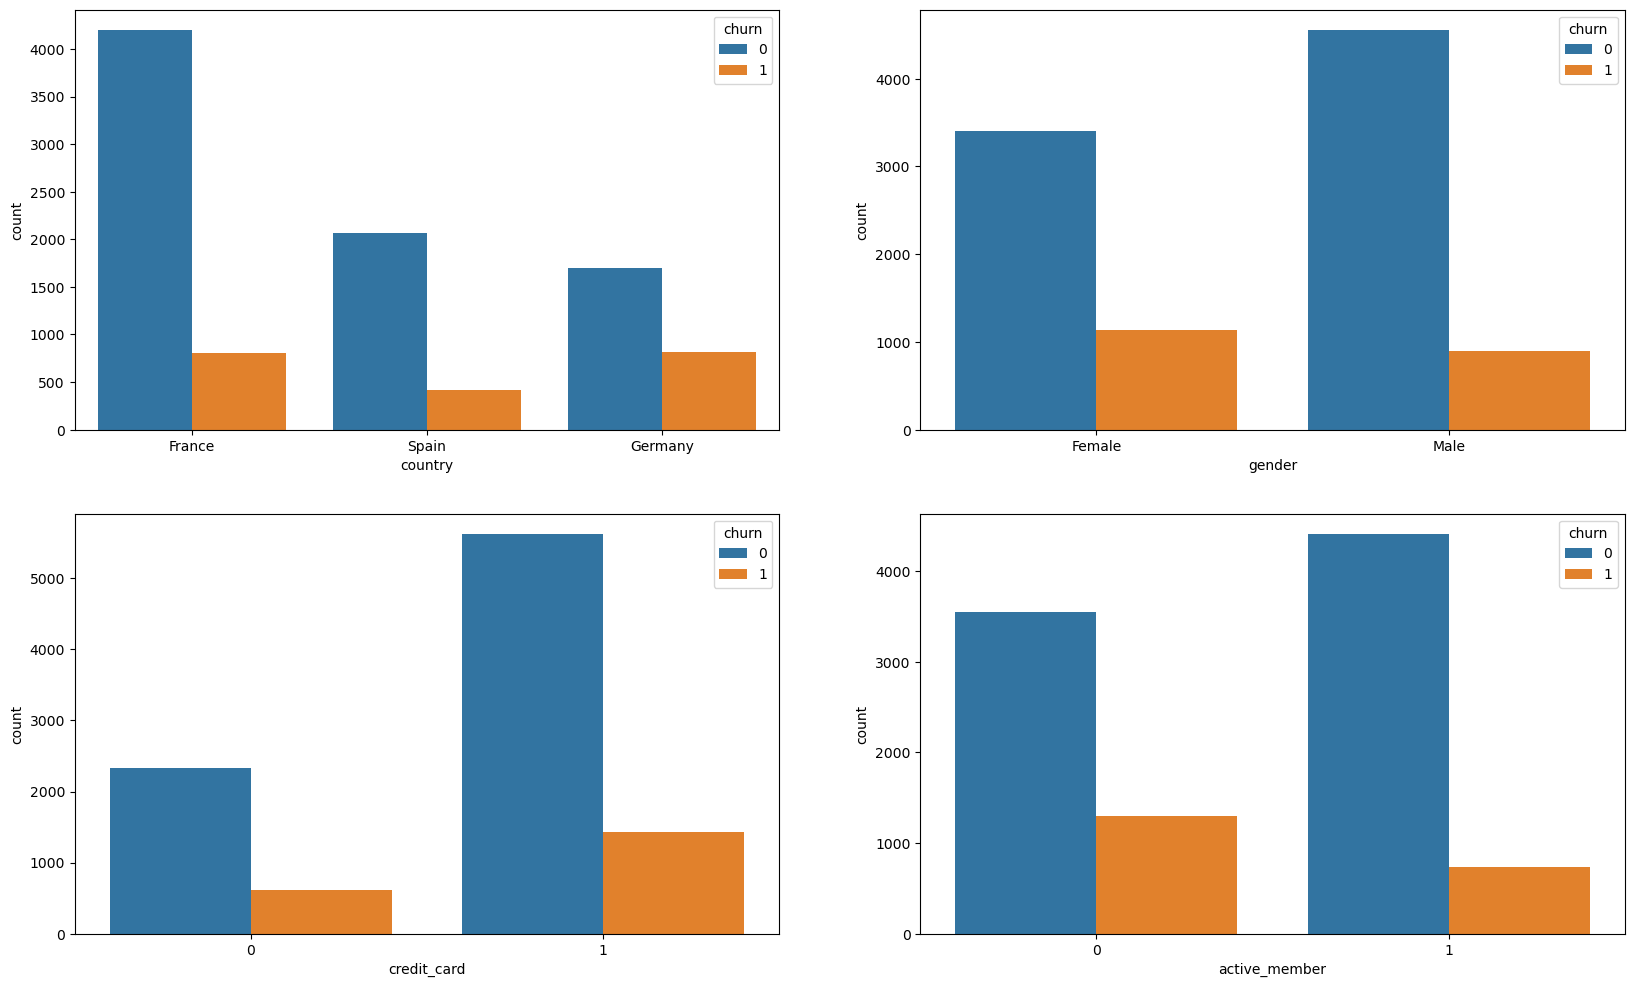

In [46]:
fig, axarr = plt.subplots(2, 2, figsize = (20, 12))
sns.countplot(x = 'country', hue = 'churn', data = df, ax = axarr[0][0])
sns.countplot(x = 'gender', hue = 'churn', data = df, ax = axarr[0][1])
sns.countplot(x = 'credit_card', hue = 'churn', data = df, ax = axarr[1][0])
sns.countplot(x = 'active_member', hue = 'churn', data = df, ax = axarr[1][1])

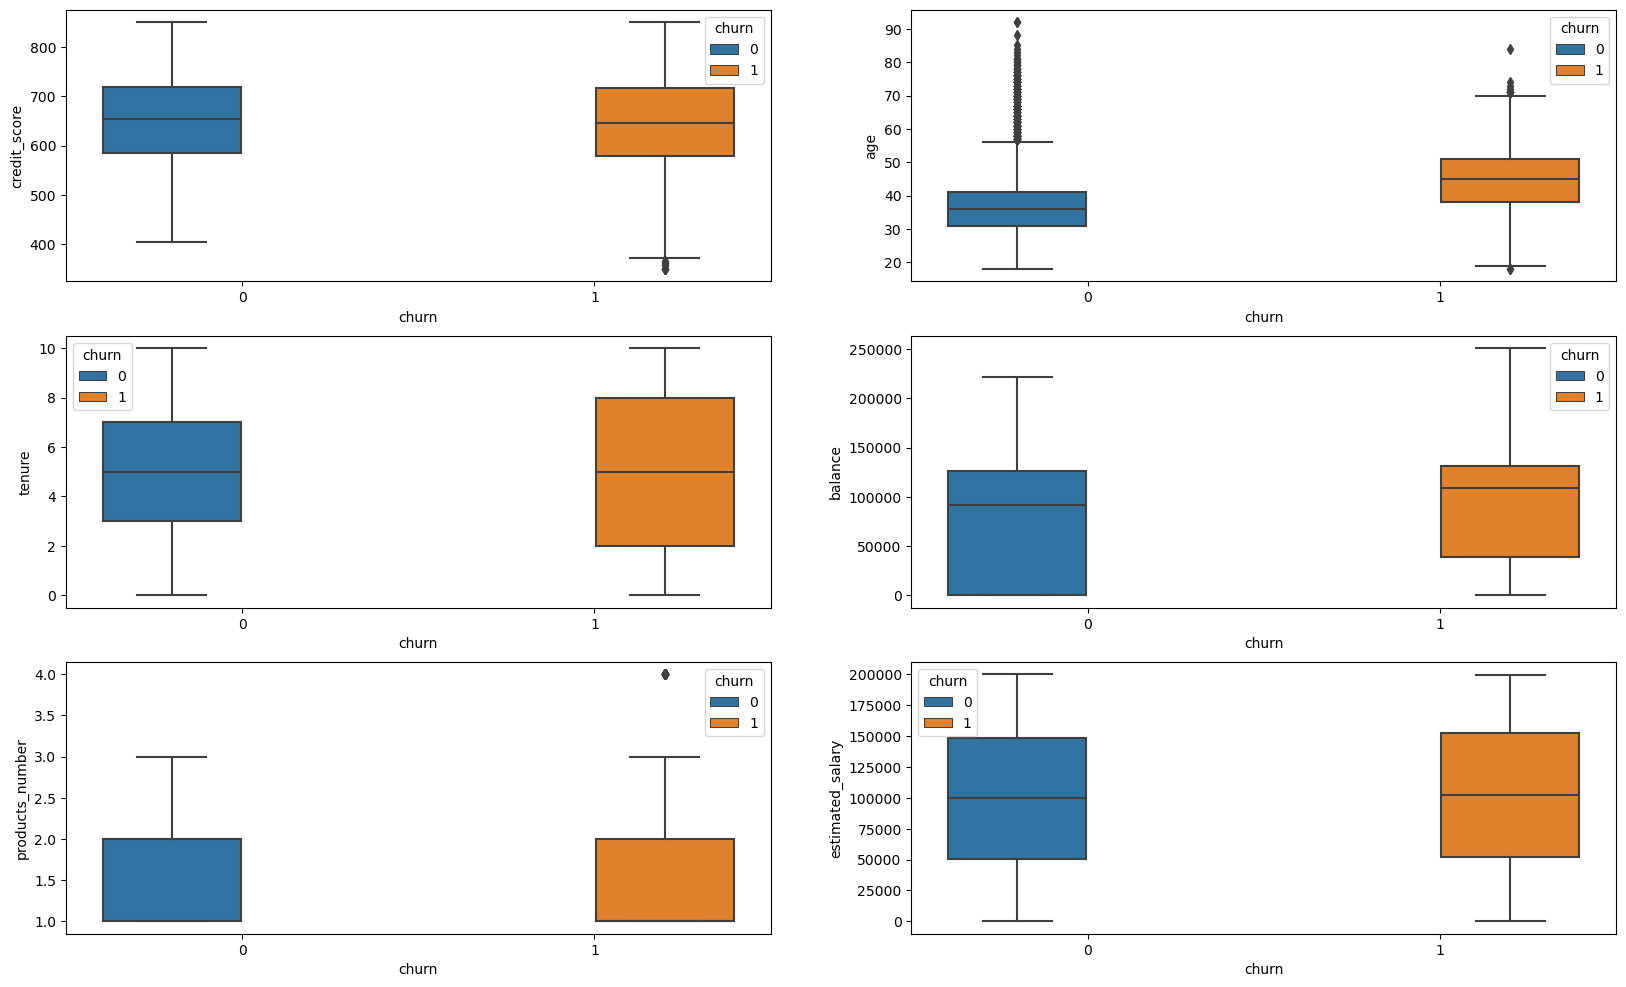

In [47]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize =(20, 12))

sns.boxplot(y = 'credit_score', x = 'churn', hue = 'churn', data = df, ax = axarr[0][0])
sns.boxplot(y = 'age', x = 'churn', hue = 'churn', data = df, ax = axarr[0][1])
sns.boxplot(y = 'tenure', x = 'churn', hue = 'churn', data = df, ax = axarr[1][0])
sns.boxplot(y = 'balance', x = 'churn', hue = 'churn', data = df, ax = axarr[1][1])
sns.boxplot(y = 'products_number', x = 'churn', hue = 'churn', data = df, ax = axarr[2][0])
sns.boxplot(y = 'estimated_salary', x = 'churn', hue = 'churn', data = df, ax = axarr[2][1])
plt.show()

In [48]:
dfTenure = df.tenure >=600

In [49]:
dfTenure

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: tenure, Length: 10000, dtype: bool

<AxesSubplot:xlabel='balance', ylabel='churn'>

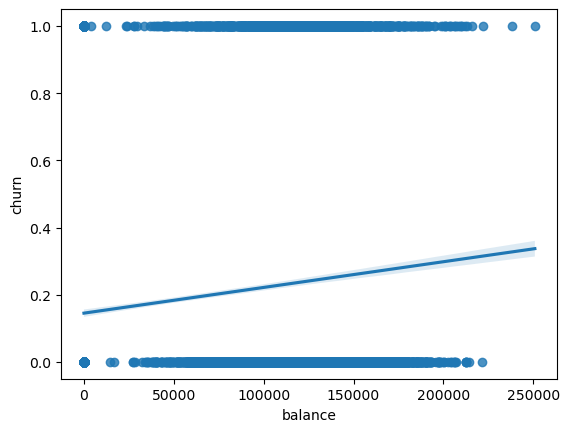

In [50]:
sns.regplot(x = 'balance', y = 'churn', data = df)

In [51]:
df[['balance', 'churn']].corr()

,balance,churn
balance,1.000000,0.118533
churn,0.118533,1.000000


In [52]:
df.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'credit_scoreGroup'],
      dtype='object')

<AxesSubplot:xlabel='credit_score', ylabel='churn'>

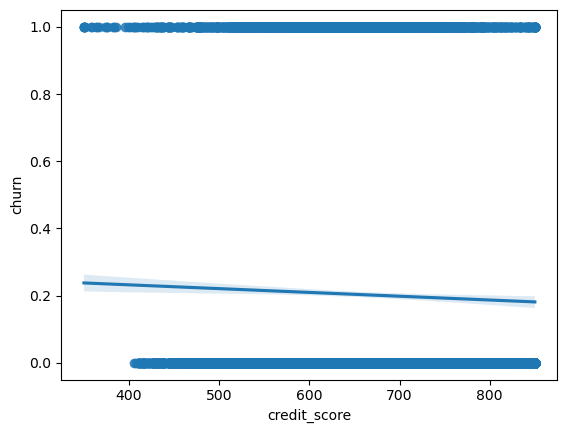

In [53]:
sns.regplot(x = 'credit_score', y = 'churn', data = df)

In [54]:
df[['credit_score', 'churn']].corr()

,credit_score,churn
credit_score,1.000000,-0.027094
churn,-0.027094,1.000000


<AxesSubplot:xlabel='active_member', ylabel='churn'>

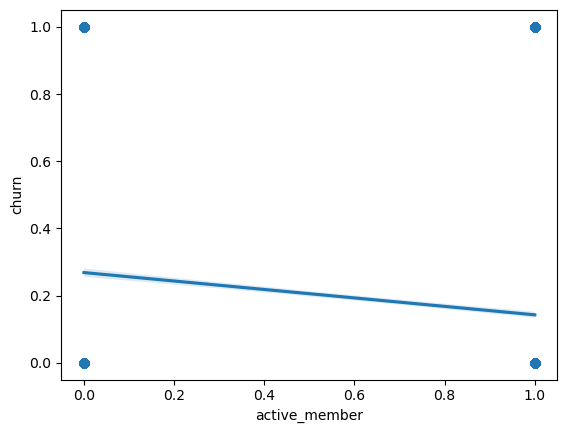

In [55]:
sns.regplot(x = 'active_member', y = 'churn', data = df)

In [56]:
df[['active_member', 'churn']].corr()

,active_member,churn
active_member,1.000000,-0.156128
churn,-0.156128,1.000000


<AxesSubplot:xlabel='estimated_salary', ylabel='churn'>

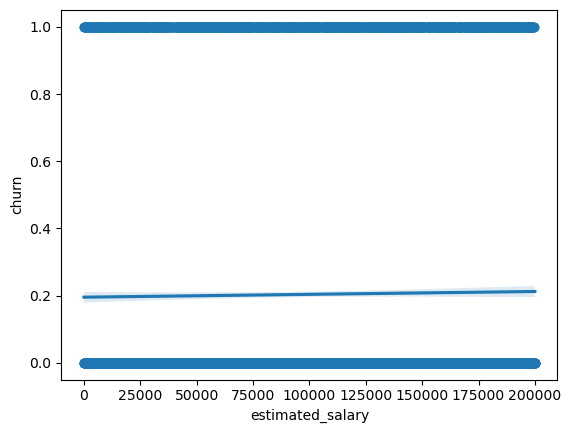

In [57]:
sns.regplot(x = 'estimated_salary', y = 'churn', data = df)

In [58]:
df[['estimated_salary', 'churn']].corr()

,estimated_salary,churn
estimated_salary,1.000000,0.012097
churn,0.012097,1.000000


<AxesSubplot:xlabel='tenure', ylabel='churn'>

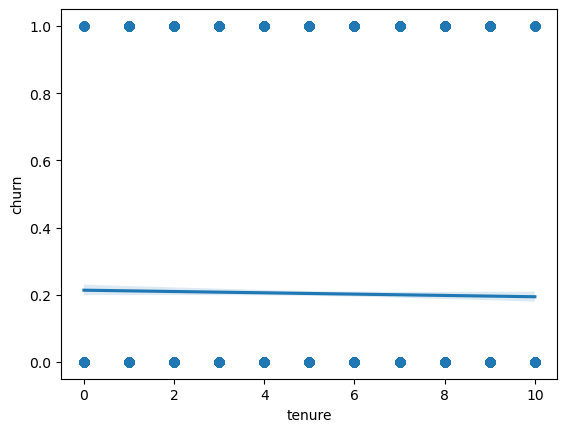

In [59]:
sns.regplot(data=df, y='churn', x='tenure')

In [60]:
df[['tenure', 'churn']].corr()

,tenure,churn
tenure,1.000000,-0.014001
churn,-0.014001,1.000000


<AxesSubplot:xlabel='age', ylabel='churn'>

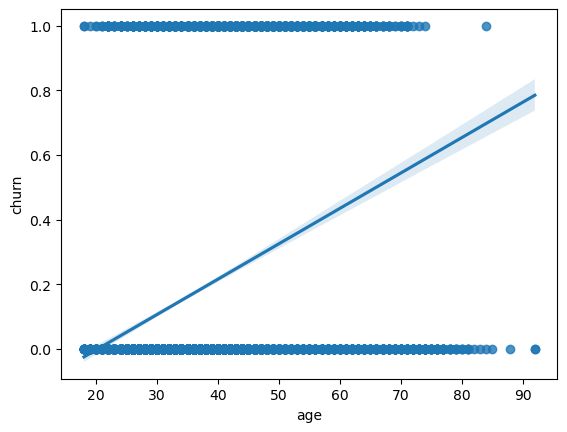

In [61]:
sns.regplot(data=df, y='churn', x='age')

In [62]:
df[['age', 'churn']].corr()

,age,churn
age,1.000000,0.285323
churn,0.285323,1.000000


In [63]:
print('The minimum age is', df['age'].min())
print('The maximum age is', df['age'].max())
print('The average age is',df['age'].mean())

The minimum age is 18
The maximum age is 92
The average age is 38.9218


<AxesSubplot:xlabel='credit_card', ylabel='churn'>

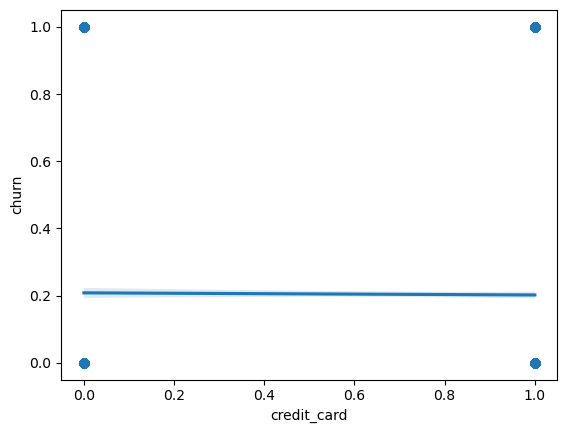

In [64]:
sns.regplot(data=df, y='churn', x='credit_card')

In [65]:
df[['credit_card', 'churn']].corr()

,credit_card,churn
credit_card,1.000000,-0.007138
churn,-0.007138,1.000000


<AxesSubplot:xlabel='products_number', ylabel='churn'>

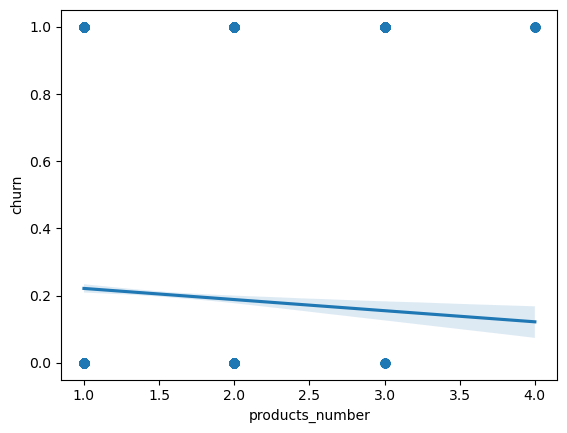

In [66]:
sns.regplot(data=df, y='churn', x='products_number')

In [67]:
df[['products_number', 'churn']].corr()

,products_number,churn
products_number,1.00000,-0.04782
churn,-0.04782,1.00000


In [68]:
df=df.drop(columns =['credit_scoreGroup'], axis=1)

In [69]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [70]:
df.corr()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


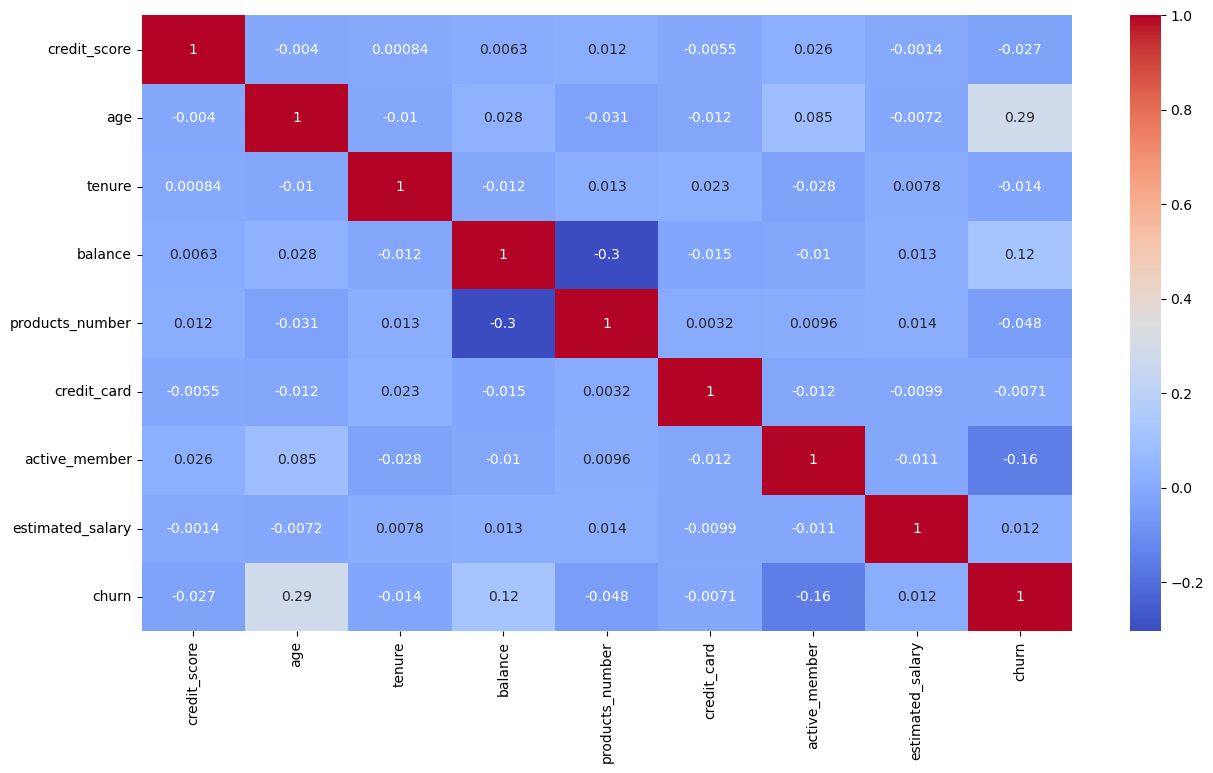

In [71]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)
plt.show()

## Findings 

1. More female customers left the bank than their male counterpart
2. More customers with over 600 credit score with tenure 1,2,3,5 and 9 left the bank.
3. no customer with 6,7 and 10 loan tenure left the bank. and they had over 600 credit score. 
4. The Bank should give more loan for 6 and 7 months tenure.

There is no significance difference in credit score of customers that are churing and no churning.
From boxplot, we can say that customers with more age are churning more than those with less age. So bank needs to bring
some good packages to keep retention rate low for elderly customers. 3. From the boxplot, we can say that customers with less and more tenure are leaving as the range in boxplot is scattered for churned customers. So we need to do something new for new customers and old customers as well to retain those customers. 4. Customers having more balance are churning more. So it will create lack of liquidity. 5. There is no significance difference between estimated salary of churned and unchurned customers. 6. There is some outliers in credit score, age, and num of products in data.

## Preprocessing and Modelling

In [72]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [73]:
df['country']=df['country'].astype('category')
df['countryCat']=df['country'].cat.codes

df['gender']=df['gender'].astype('category')
df['genderCat']=df['gender'].cat.codes

In [74]:
print(df['gender'].unique())
df['genderCat'].unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']


array([0, 1], dtype=int8)

In [75]:
print(df['country'].unique())
df['countryCat'].unique()

['France', 'Spain', 'Germany']
Categories (3, object): ['France', 'Germany', 'Spain']


array([0, 2, 1], dtype=int8)

In [76]:
df.drop(['country', 'gender'], inplace = True, axis=1)

In [77]:
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,countryCat,genderCat
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0


In [78]:
df.rename(columns= {'countryCat': 'country', 'genderCat': 'gender'}, inplace=True)

In [79]:
df.dtypes

credit_score          int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
country                int8
gender                 int8
dtype: object

In [80]:
# Feature selection

In [81]:
df.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn', 'country',
       'gender'],
      dtype='object')

In [82]:
y = df.churn
x = df.drop('churn', axis = 1)


In [83]:
x

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country,gender
0,619,42,2,0.00,1,1,1,101348.88,0,0
1,608,41,1,83807.86,1,0,1,112542.58,2,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0
4,850,43,2,125510.82,1,1,1,79084.10,2,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1


In [84]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size =0.80, random_state= 1)
print('Train', xtrain.shape, ytrain.shape)
print('Test', xtest.shape, ytest.shape)

Train (8000, 10) (8000,)
Test (2000, 10) (2000,)


In [85]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [86]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


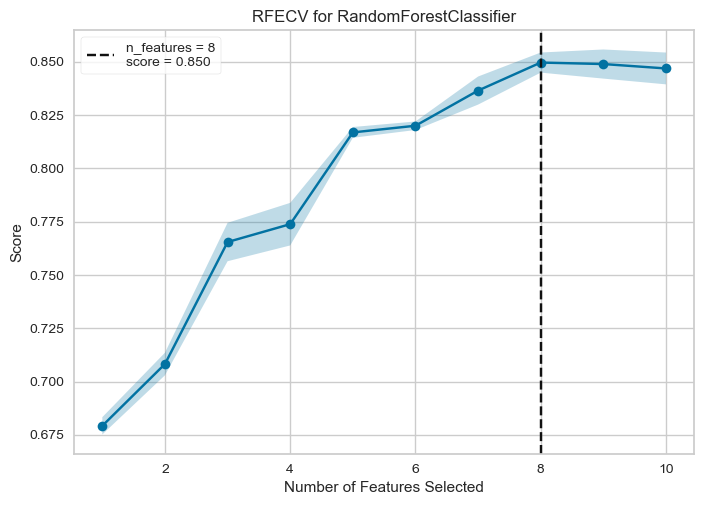

<AxesSubplot:title={'center':'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import RFECV
#from yellowbrick.datasets import load_credit

# Load classification dataset
y = df.churn
x = df.drop('churn', axis = 1)
#x, y = load_credit()

cv = StratifiedKFold(5)
rfecv = RFECV(RandomForestClassifier(), cv=cv, scoring='f1_weighted')

rfecv.fit(x, y)        # Fit the data to the visualizer
rfecv.show()           # Finalize and render the figure

In [88]:
print("Feature ranking: ", rfecv.ranking_)

print('Optimal number of features :', rfecv.n_features_)

print('Best features :', x.columns[rfecv.support_])

print('Original features :', x.columns)

Feature ranking:  [1 1 1 1 1 2 1 1 1 3]
Optimal number of features : 8
Best features : Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'active_member', 'estimated_salary', 'country'],
      dtype='object')
Original features : Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'country',
       'gender'],
      dtype='object')


In [89]:
# summarize all features
for i in range(x.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfecv.support_[i], rfecv.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 2.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 3.000


In [90]:
x.head(3)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country,gender
0,619,42,2,0.00,1,1,1,101348.88,0,0
1,608,41,1,83807.86,1,0,1,112542.58,2,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0


In [91]:
x.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'country',
       'gender'],
      dtype='object')

In [92]:
Xbest = x[['credit_score', 'age', 'tenure', 'balance', 'products_number', 'active_member', 'estimated_salary', 'country']]

In [93]:
Xbest

,credit_score,age,tenure,balance,products_number,active_member,estimated_salary,country
0,619,42,2,0.00,1,1,101348.88,0
1,608,41,1,83807.86,1,1,112542.58,2
2,502,42,8,159660.80,3,0,113931.57,0
3,699,39,1,0.00,2,0,93826.63,0
4,850,43,2,125510.82,1,1,79084.10,2
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,0,96270.64,0
9996,516,35,10,57369.61,1,1,101699.77,0
9997,709,36,7,0.00,1,1,42085.58,0
9998,772,42,3,75075.31,2,0,92888.52,1


In [94]:
X = Xbest

In [95]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, train_size =0.80, random_state= 1)
print('Train', Xtrain.shape, ytrain.shape)
print('Test', Xtest.shape, ytest.shape)

Train (8000, 8) (8000,)
Test (2000, 8) (2000,)


In [96]:
## Standardizing the data
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler().fit(Xtrain)
XTrainedScaler = Scaler.transform(Xtrain)
XTestScaler = Scaler.transform(Xtest)

>knn -0.211 (0.009)
>DT -0.213 (0.015)
>lr -0.289 (0.007)
>logistic -0.193 (0.014)
>rf -0.216 (0.008)


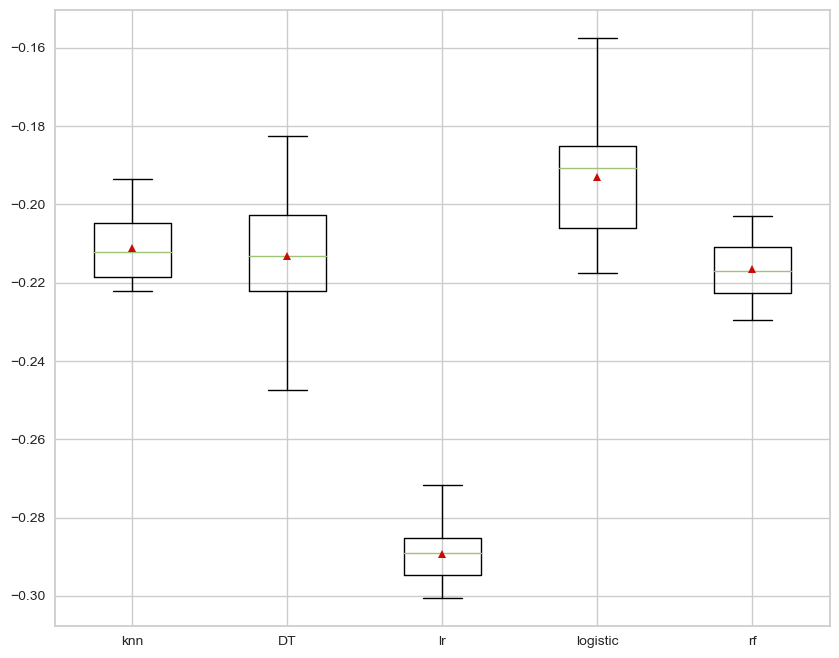

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
from matplotlib import pyplot

# get a list of models to evaluate
def get_models(): #creates the models we wish to evaluate
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['DT'] = DecisionTreeRegressor()
    models['lr'] = LinearRegression()
    models['logistic'] = LogisticRegression()
    models['rf'] = RandomForestRegressor()
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(models, XTrainedScaler, ytrain): #takes a model instance and returns a list of scores from three repeats of 10-fold cross-validation
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(models, XTrainedScaler, ytrain, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, XTrainedScaler, ytrain)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# plot model performance for comparison
plt.figure(figsize=(10,8))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


From the above result, we can see that logisticregression algorithm performed better than others.
So we will use the Logistic Regression model to predict Customer Churn

In [98]:
logmodel = LogisticRegression()

# fit model
logmodel.fit(XTrainedScaler, ytrain)

# make predictions on the entire training dataset
Prediction = logmodel.predict(XTestScaler)

# connect predictions with outputs
for i in range(5):
    print(XTestScaler[i].round(), Prediction[i])

[-1.  1. -1. -1.  1.  1. -0. -1.] 0
[ 0. -0. -1.  1. -1. -1. -1. -1.] 0
[-1.  0. -1. -1.  1.  1. -0. -1.] 0
[ 1. -0.  1.  1.  1.  1. -2.  0.] 0
[-1. -1.  0. -0. -1.  1.  1.  0.] 0


In [99]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(ytest, Prediction))

[[1544   41]
 [ 340   75]]


In [100]:
print(classification_report(ytest, Prediction))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1585
           1       0.65      0.18      0.28       415

    accuracy                           0.81      2000
   macro avg       0.73      0.58      0.59      2000
weighted avg       0.78      0.81      0.76      2000



In [101]:
# Checking our model accuracy
trainingResult = logmodel.score(XTrainedScaler, ytrain)
print("Training Accuracy: {}".format(trainingResult*100.0))
testResult = logmodel.score(XTestScaler, ytest)
print("Testing Accuracy: {}".format(testResult*100.0))

Training Accuracy: 80.7875
Testing Accuracy: 80.95


## APPLYING SMOTEENN

In [106]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [171]:
smoteModel = LogisticRegression(max_iter=100)
sm = SMOTEENN()
Xresampled, yresampled = sm.fit_resample(X,y)

xstrain, xstest, ystrain, ystest = train_test_split(Xresampled,yresampled, train_size =0.80, random_state= 1)
print('Train', xstrain.shape, ystrain.shape)
print('Test', xstest.shape, ystest.shape)

Train (5200, 8) (5200,)
Test (1300, 8) (1300,)


In [172]:
# fit model
smoteModel.fit(xstrain, ystrain)

# make predictions on the entire training dataset
ysPred = smoteModel.predict(xstest)


In [173]:
print(classification_report(ystest, ysPred))

              precision    recall  f1-score   support

           0       0.69      0.61      0.65       573
           1       0.72      0.79      0.75       727

    accuracy                           0.71      1300
   macro avg       0.71      0.70      0.70      1300
weighted avg       0.71      0.71      0.71      1300



In [174]:
print(confusion_matrix(ystest, ysPred))

[[352 221]
 [156 571]]


In [175]:
trainingsResult = smoteModel.score(xstrain, ystrain)
print("Training Accuracy: {}".format(trainingsResult*100.0))
testsResult = smoteModel.score(xstest, ystest)
print("Testing Accuracy: {}".format(testsResult*100.0))

Training Accuracy: 70.0
Testing Accuracy: 71.0
